<a href="https://colab.research.google.com/github/Rokuske/Data/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BA%D1%80%D0%B8%D0%BF%D1%82%D0%BE%D0%B2%D0%B0%D0%BB%D1%8E%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
df = data.drop(['high', 'low', 'close', 'volume'], axis=1)
df

,open
timestamp,
2023-06-18 00:00:00,26519.10
2023-06-18 00:05:00,26508.01
2023-06-18 00:10:00,26511.30
2023-06-18 00:15:00,26519.44
2023-06-18 00:20:00,26513.33
...,...
2023-07-03 23:35:00,31126.23
2023-07-03 23:40:00,31127.02
2023-07-03 23:45:00,31136.55


In [ ]:
df.index.names=['timestamp']
df = df.sort_index()

In [ ]:
df

,open
timestamp,
2023-06-18 00:00:00,26519.10
2023-06-18 00:05:00,26508.01
2023-06-18 00:10:00,26511.30
2023-06-18 00:15:00,26519.44
2023-06-18 00:20:00,26513.33
...,...
2023-07-03 23:35:00,31126.23
2023-07-03 23:40:00,31127.02
2023-07-03 23:45:00,31136.55


In [ ]:
from pandas.core.internals.construction import dataclasses_to_dicts
from sklearn.model_selection import train_test_split
def preprocess_data(datas, lag_start=5, lag_end=20):
    #Окк
  #datas = pd.DataFrame(dataclasses_to_dicts.copy())
  # добавляем лаги исходного ряда в качестве признаков
  for i in range(lag_start, lag_end):
        datas[f"lag_{i}"] = datas['open'].shift(i)

  datas = datas.dropna()

  datas["day"] = datas.index.day
  datas["hour"] = datas.index.hour

  XX_train, XX_test = train_test_split(datas, test_size=0.15, shuffle = False)

  # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
  XX_train["day_avg"] = list(map(code_mean(XX_train, "day", "open").get, datas['day']))
  XX_train["hour_avg"] = list(map(code_mean(XX_train, "hour", "open").get, datas["hour"]))

  # выкидываем закодированные средними признаки
  XX_train.drop(["day"], axis=1, inplace=True)
  XX_train.drop(["hour"], axis=1, inplace=True)
  XX_test.drop(["day"], axis=1, inplace=True)
  XX_test.drop(["hour"], axis=1, inplace=True)
  XX_test = XX_test.dropna()
  XX_train = XX_train.dropna()

  # разбиваем весь датасет на тренировочную и тестовую выборку
  X_train = XX_train.drop(["open"], axis=1, inplace=True)
  y_train = XX_train.drop([["lag_5",	'lag_6',	'lag_7',	'lag_8',	'lag_9',	'lag_10',	'lag_11',	'lag_12',	'lag_13',	'lag_14',	'lag_15',	'lag_16',	'lag_17',	'lag_18',	'lag_19']], axis=1, inplace=True)
  X_test = XX_test.drop(["open"], axis=1, inplace=True)
  y_test = XX_test.drop([["lag_5",	'lag_6',	'lag_7',	'lag_8',	'lag_9',	'lag_10',	'lag_11',	'lag_12',	'lag_13',	'lag_14',	'lag_15',	'lag_16',	'lag_17',	'lag_18',	'lag_19']], axis=1, inplace=True)

  return X_train, X_test, y_train, y_test

In [ ]:
  for i in range(1, 20):
        df[f"lag_{i}"] = df['open'].shift(i)
df

,open,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19
timestamp,,,,,,,,,,,,,,,,,,,,
2023-06-18 00:00:00,26519.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-18 00:05:00,26508.01,26519.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-18 00:10:00,26511.30,26508.01,26519.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-18 00:15:00,26519.44,26511.30,26508.01,26519.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-18 00:20:00,26513.33,26519.44,26511.30,26508.01,26519.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74
2023-07-03 23:40:00,31127.02,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01
2023-07-03 23:45:00,31136.55,31127.02,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14


In [ ]:
df = df.dropna()
df

,open,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19
timestamp,,,,,,,,,,,,,,,,,,,,
2023-06-18 01:35:00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.10
2023-06-18 01:40:00,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01
2023-06-18 01:45:00,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30
2023-06-18 01:50:00,26459.88,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44
2023-06-18 01:55:00,26478.14,26459.88,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74
2023-07-03 23:40:00,31127.02,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01
2023-07-03 23:45:00,31136.55,31127.02,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14


In [ ]:
df["day"] = df.index.day
df["hour"] =df.index.hour

df["day_average"] = list(map(code_mean(df, "day", "open").get, df['day']))
df["hour_average"] = list(map(code_mean(df, "hour", "open").get, df['hour']))

XX_train, XX_test = train_test_split(df, test_size=0.15, shuffle = False)

In [ ]:
XX_train

,open,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day,hour,day_average,hour_average
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-18 01:35:00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,...,26437.12,26513.33,26519.44,26511.30,26508.01,26519.10,18,1,26519.168922,29700.212919
2023-06-18 01:40:00,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,...,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,18,1,26519.168922,29700.212919
2023-06-18 01:45:00,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,...,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,18,1,26519.168922,29700.212919
2023-06-18 01:50:00,26459.88,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,...,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,18,1,26519.168922,29700.212919
2023-06-18 01:55:00,26478.14,26459.88,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,...,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,18,1,26519.168922,29700.212919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 14:10:00,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,...,30564.62,30588.68,30600.00,30598.83,30594.86,30555.53,1,14,30512.006528,29667.686406
2023-07-01 14:15:00,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,...,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,1,14,30512.006528,29667.686406
2023-07-01 14:20:00,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,...,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,1,14,30512.006528,29667.686406


In [ ]:
XX_test

,open,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day,hour,day_average,hour_average
timestamp,,,,,,,,,,,,,,,,
2023-07-01 14:35:00,30559.76,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,1,14,30463.090682,29505.713720
2023-07-01 14:40:00,30561.13,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,1,14,30463.090682,29505.713720
2023-07-01 14:45:00,30564.76,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,1,14,30463.090682,29505.713720
2023-07-01 14:50:00,30602.20,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,1,14,30463.090682,29505.713720
2023-07-01 14:55:00,30603.57,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,1,14,30463.090682,29505.713720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74,3,23,NaN,29621.921795
2023-07-03 23:40:00,31127.02,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,3,23,NaN,29621.921795
2023-07-03 23:45:00,31136.55,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,3,23,NaN,29621.921795


In [ ]:
#OKK ^

In [ ]:
XX_train.drop(["day"], axis=1, inplace=True)
XX_train.drop(["hour"], axis=1, inplace=True)
XX_test.drop(["day"], axis=1, inplace=True)
XX_test.drop(["hour"], axis=1, inplace=True)
XX_test = XX_test.dropna()
XX_train = XX_train.dropna()

In [ ]:
XX_test

,open,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day_average,hour_average
timestamp,,,,,,,,,,,,,,
2023-07-01 14:35:00,30559.76,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30512.006528,29667.686406
2023-07-01 14:40:00,30561.13,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30512.006528,29667.686406
2023-07-01 14:45:00,30564.76,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30512.006528,29667.686406
2023-07-01 14:50:00,30602.20,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30512.006528,29667.686406
2023-07-01 14:55:00,30603.57,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30512.006528,29667.686406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74,30829.732917,29836.838177
2023-07-03 23:40:00,31127.02,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,30829.732917,29836.838177
2023-07-03 23:45:00,31136.55,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,30829.732917,29836.838177


In [ ]:
XX_train

,open,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day_average,hour_average
timestamp,,,,,,,,,,,,,,
2023-06-18 01:35:00,26440.09,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.10,26519.168922,29700.212919
2023-06-18 01:40:00,26472.00,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.168922,29700.212919
2023-06-18 01:45:00,26457.37,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26519.168922,29700.212919
2023-06-18 01:50:00,26459.88,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26519.168922,29700.212919
2023-06-18 01:55:00,26478.14,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.168922,29700.212919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 14:10:00,30544.91,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,30555.53,30512.006528,29667.686406
2023-07-01 14:15:00,30556.51,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,30512.006528,29667.686406
2023-07-01 14:20:00,30556.71,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30512.006528,29667.686406


In [ ]:
X_train = XX_train.copy()
X_train.drop(["open"], axis=1, inplace=True)
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day_average,hour_average
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-18 01:35:00,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,...,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.10,26519.168922,29700.212919
2023-06-18 01:40:00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,26413.75,...,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.168922,29700.212919
2023-06-18 01:45:00,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,26430.23,...,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26519.168922,29700.212919
2023-06-18 01:50:00,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,26442.69,...,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26519.168922,29700.212919
2023-06-18 01:55:00,26459.88,26457.37,26472.00,26440.09,26450.30,26432.68,26430.32,26424.30,26445.92,26440.58,...,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.168922,29700.212919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 14:10:00,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,...,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,30555.53,30512.006528,29667.686406
2023-07-01 14:15:00,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,...,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,30512.006528,29667.686406
2023-07-01 14:20:00,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,...,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30512.006528,29667.686406


In [ ]:
XX_train

,open,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day_average,hour_average
timestamp,,,,,,,,,,,,,,
2023-06-18 01:35:00,26440.09,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.10,26519.168922,29700.212919
2023-06-18 01:40:00,26472.00,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26508.01,26519.168922,29700.212919
2023-06-18 01:45:00,26457.37,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26511.30,26519.168922,29700.212919
2023-06-18 01:50:00,26459.88,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.44,26519.168922,29700.212919
2023-06-18 01:55:00,26478.14,26445.92,26440.58,26442.69,26430.23,26413.75,26404.98,26447.93,26442.69,26477.27,26437.12,26513.33,26519.168922,29700.212919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 14:10:00,30544.91,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,30555.53,30512.006528,29667.686406
2023-07-01 14:15:00,30556.51,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30594.86,30512.006528,29667.686406
2023-07-01 14:20:00,30556.71,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,30600.00,30598.83,30512.006528,29667.686406


In [ ]:
y_train = XX_train.copy()
y_train.drop(XX_train[['lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_8','lag_9',	'lag_10',	'lag_11',	'lag_12',	'lag_13',	'lag_14',	'lag_15',	'lag_16',	'lag_17',	'lag_18',	'lag_19', 'day_average', 'hour_average']], axis=1, inplace=True)
y_train

,open
timestamp,
2023-06-18 01:35:00,26440.09
2023-06-18 01:40:00,26472.00
2023-06-18 01:45:00,26457.37
2023-06-18 01:50:00,26459.88
2023-06-18 01:55:00,26478.14
...,...
2023-07-01 14:10:00,30544.91
2023-07-01 14:15:00,30556.51
2023-07-01 14:20:00,30556.71


In [ ]:
X_test = XX_test.copy()
X_test.drop(["open"], axis=1, inplace=True)
X_test

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day_average,hour_average
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-01 14:35:00,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,...,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30512.006528,29667.686406
2023-07-01 14:40:00,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,...,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30512.006528,29667.686406
2023-07-01 14:45:00,30561.13,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,...,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30512.006528,29667.686406
2023-07-01 14:50:00,30564.76,30561.13,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,...,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30512.006528,29667.686406
2023-07-01 14:55:00,30602.20,30564.76,30561.13,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,...,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30512.006528,29667.686406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,...,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74,30829.732917,29836.838177
2023-07-03 23:40:00,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,...,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,30829.732917,29836.838177
2023-07-03 23:45:00,31127.02,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,...,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,30829.732917,29836.838177


In [ ]:
X_test

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,day_average,hour_average
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-01 14:35:00,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,...,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30512.006528,29667.686406
2023-07-01 14:40:00,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,...,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30512.006528,29667.686406
2023-07-01 14:45:00,30561.13,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,...,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30512.006528,29667.686406
2023-07-01 14:50:00,30564.76,30561.13,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,...,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30512.006528,29667.686406
2023-07-01 14:55:00,30602.20,30564.76,30561.13,30559.76,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,...,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30512.006528,29667.686406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,...,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74,30829.732917,29836.838177
2023-07-03 23:40:00,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,...,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,30829.732917,29836.838177
2023-07-03 23:45:00,31127.02,31126.23,31117.26,31112.99,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,...,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,30829.732917,29836.838177


In [ ]:
y_test = XX_test.copy()
y_test.drop(XX_test[['lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_8','lag_9',	'lag_10',	'lag_11',	'lag_12',	'lag_13',	'lag_14',	'lag_15',	'lag_16',	'lag_17',	'lag_18',	'lag_19','day_average', 'hour_average']], axis=1, inplace=True)
y_test

,open
timestamp,
2023-07-01 14:35:00,30559.76
2023-07-01 14:40:00,30561.13
2023-07-01 14:45:00,30564.76
2023-07-01 14:50:00,30602.20
2023-07-01 14:55:00,30603.57
...,...
2023-07-03 23:35:00,31126.23
2023-07-03 23:40:00,31127.02
2023-07-03 23:45:00,31136.55


In [ ]:
from sklearn.metrics import mean_absolute_error

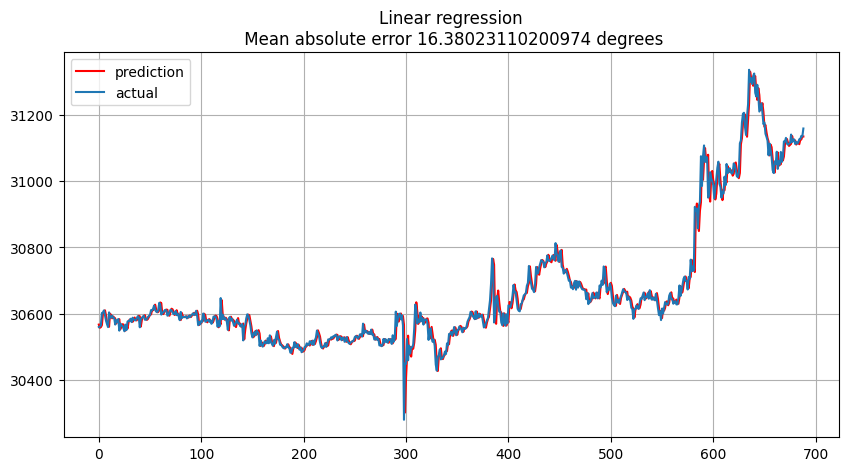

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");